## **Linear Regression**
We will use Linear regression for predicting house prices

We are using a Kaggle dataset- https://www.kaggle.com/harlfoxem/housesalesprediction

In [158]:
# Lets import required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### **Dataset Preparation**

In [159]:
# Execute this cell for loading dataset in a pandas dataframe

from IPython.display import clear_output
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=16x6-8Znn2T50zFwVvKlzsdN7Jd1hpjct' -O Linear_regression_dataset

data_df = pd.read_csv("Linear_regression_dataset")

--2024-12-08 07:26:49--  https://docs.google.com/uc?export=download&id=16x6-8Znn2T50zFwVvKlzsdN7Jd1hpjct
Resolving docs.google.com (docs.google.com)... 74.125.143.101, 74.125.143.138, 74.125.143.139, ...
Connecting to docs.google.com (docs.google.com)|74.125.143.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=16x6-8Znn2T50zFwVvKlzsdN7Jd1hpjct&export=download [following]
--2024-12-08 07:26:49--  https://drive.usercontent.google.com/download?id=16x6-8Znn2T50zFwVvKlzsdN7Jd1hpjct&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.153.132, 2a00:1450:4013:c16::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.153.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2515206 (2.4M) [application/octet-stream]
Saving to: ‘Linear_regression_dataset’

Linear_regression_d 100%[===================>]   2.40M  

In [160]:
# Lets have a quick Look at dataset

print("(No of rows, No of Columns) = ",data_df.shape)
data_df.head()

(No of rows, No of Columns) =  (21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


So there are **19** features (of course we will not use id as feature :) ), and 1 variable to predict(price)

But note that the **date** column contain strings so first we will remove T00.. part from it and than convert it to numpy array.

In [161]:
data_df['date'] = data_df['date'].str.replace("T000000","").astype('int64')                                        # Remove T000000 part from data column. Hint: search about .str.replace() method. :)

data_array = data_df.drop(columns=['id'])                                           # Create a numpy array which does not have "id" field
assert (data_array.shape == (21613,20))

data_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Now the next task is **normalization**.

We will scale each column of dataset by x -> (x-u)/s

where u is mean(x), and s is standard deviation of u

In [162]:
data_array.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [163]:
mean = data_array.mean(axis=0)                                  # this should be an array, each entry should be mean of a column
sd = data_array.std(axis=0)                                   # this should be an array, each entry should be standard deviation of a column

data_array_norm = (data_array - mean)/sd

print(data_array_norm.shape)

(21613, 20)


The last step is to make train and test dataset and to create seperate vector for price

In [164]:
labels = data_array_norm['price']                                                                                                    # extract the price column from data

x_array_norm = np.delete(data_array_norm,1,axis=1)                                                                                                    # delete the price column from data_array_norm. Hint: use np.delete()

x_train, x_test, y_train, y_test = train_test_split(x_array_norm,labels,test_size=0.15,random_state=42,shuffle=True)    # splitting data into test and train set.

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(18371, 19) (3242, 19) (18371,) (3242,)


### **Loss and gradient descent**
We will use mean squared error(MSE) as loss

Use the gradient descent algorithm which you learned from tutorials

Your task is to complete the following functions

In [165]:
def loss(y_pred,y_true):
  """
  input:
  y_pred = [array] predicted value of y
  y_true = [array] ground truth

  output:
  mse: [scalar] the MES loss
  """
  mse = np.mean((y_true-y_pred)**2)                      # fill code here

  return mse

In [166]:
def y(x,a,b):
  """
  This function should return predicted value of y = ax+b
  input:
  x: [array] the feature vector of shape (m,n)
  a: [array] weights of shape (n,)
  b: [scalar] bias

  output:
  y_pred: [array] predicted value of y of shape (m,)
  """

  m,n = x.shape
  y_pred = np.dot(x,a)+b              # fill code here

  assert(y_pred.shape == (m,))
  return y_pred

In [167]:
def gradient(x,a,b,y_true):
  """
  This function shoud return gradient of loss
  input:
  x: [array] the feature vector of shape (m,n)
  a: [array] weights of shape (n,)
  b: [scalar] bias
  y_true: [array] ground truth of shape (m,)

  output:
  grad: [tuple] a tuple (derivative with respect to a[array of shape(n,)], derivative with respect to b[scalar])
  """
  m,n = x.shape
  yp = y(x,a,b)

  da = -2* np.dot(x.T ,(y_true-yp))/m             # write code to calculate derivative of loss with respect to a
  db = -2* np.sum(y_true-yp)/m            # write code to calculate derivative of loss with respect to b

  assert(da.shape ==(n,))
  return (da,db)

In [168]:
def gradient_descent(x,y_true,learning_rate=0.01,epochs = 10):
  """
  This function perfroms gradient descent and minimizes loss
  input:
  x: [array] the feature vector of shape (m,n)
  y_true: [array] ground truth of shape (m,)

  output:
  loss: [array] of size (epochs,)
  weights: [tuple] (a,b)
  """
  m,n = x.shape
  loss_mse = []                                 # initialize empty list to store loss
  a = np.zeros(n)                                         # initialize a- weights and b- bias
  b = 0.0

  for i in range(epochs):
    # calculate derivative using gradient() function
    # apply gradient descent now to update a and b

    y_pred = y(x,a,b)
    a = a - learning_rate *gradient(x,a,b,y_true)[0]
    b = b - learning_rate *gradient(x,a,b,y_true)[1]

    l_mse = loss(y_pred,y_true)                            # calculate loss at this point
    loss_mse.append(l_mse)

    print("Epoch ",i+1," Completed!","loss = ",l_mse)

  print("Training completed!!")

  assert(a.shape==(n,))

  return (loss_mse,a,b)

### **Training**

In [169]:
epochs = 50              # tweak this!!!
learn_rate = 0.001          # choose learning rate wisely otherwise loss may diverge!!

train_loss,a,b = gradient_descent(x=x_train, y_true=y_train, learning_rate=learn_rate, epochs=epochs)

Epoch  1  Completed! loss =  0.9764513714094517
Epoch  2  Completed! loss =  0.9665746574770432
Epoch  3  Completed! loss =  0.9568758803782259
Epoch  4  Completed! loss =  0.947351555939105
Epoch  5  Completed! loss =  0.9379982705082555
Epoch  6  Completed! loss =  0.9288126795096833
Epoch  7  Completed! loss =  0.9197915060256515
Epoch  8  Completed! loss =  0.9109315394087455
Epoch  9  Completed! loss =  0.9022296339225802
Epoch  10  Completed! loss =  0.8936827074105499
Epoch  11  Completed! loss =  0.8852877399920468
Epoch  12  Completed! loss =  0.8770417727855748
Epoch  13  Completed! loss =  0.8689419066582064
Epoch  14  Completed! loss =  0.860985301000835
Epoch  15  Completed! loss =  0.8531691725286918
Epoch  16  Completed! loss =  0.8454907941066012
Epoch  17  Completed! loss =  0.837947493598467
Epoch  18  Completed! loss =  0.8305366527404862
Epoch  19  Completed! loss =  0.823255706037598
Epoch  20  Completed! loss =  0.8161021396826927
Epoch  21  Completed! loss =  0.8

### **Evaluation and Visualization**
Lets plot how loss varies with epochs


Loss on test data =  0.768198941015413


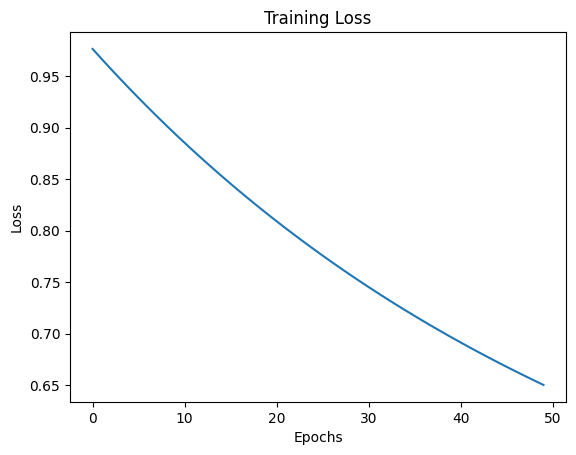

In [170]:
test_loss = loss(y(x_test,a,b),y_test)

print("Loss on test data = ",test_loss)

# Visualization of loss

plt.plot(range(epochs),train_loss)                   # plot loss versus epochs
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

## **Deep Learning**
In this section We will build a simple multilayer perceptron network(**MLP**) in TensorFlow

In [171]:
# Lets import the required libraries
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

### **Load Dataset**
We will be using MNIST dataset of handwritten digits

Just run the cell below to load dataset

In [172]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("No. of training examples = ",x_train.shape[0])
print("Size of each image in dataset = ",x_train.shape[1:])
print("No. of test examples = ",x_test.shape[0])

No. of training examples =  60000
Size of each image in dataset =  (28, 28)
No. of test examples =  10000


label: 1       4       0       8       6       

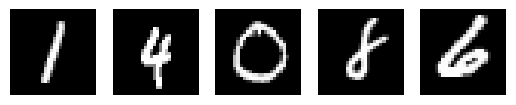

In [173]:
# Run this cell to visualize some of the images from dataset

n = 5    # = no. of images to visualize

index = np.random.choice(x_train.shape[0],5)  # choose random index
print("label: ",end="")

for i,ind in enumerate(index):
    plt.subplot(1,n,i+1)
    plt.imshow(x_train[ind],cmap="gray")
    plt.axis("off")
    print(y_train[ind],end="       ")

plt.show()

#### Preprocess dataset
Since we are building a MLP model the input to the model should be a vector rather than a 28 by 28 matrix.

So your **First Task** is to flatten the images

(Hint: use *reshape()* method of arrays...)

Next, create validation dataset out of training dataset.

You can use 50K images for training and 10K for validation

In [174]:
# Flatten the images into 1-d vectors

x_train_flatten = x_train.reshape(x_train.shape[0],-1)                                    # flatten the images of training set
x_test_flatten = x_test.reshape(x_test.shape[0],-1)                                       # flatten th eimages of test set


# Divide the training data into training and validation data....

n_validation = 10000                           # choose number of images to be used for validation

x_validation = x_train_flatten[:10000]
y_validation = y_train[:10000]

x_train_flatten = x_train_flatten[10000:]
y_train = y_train[10000:]

In [175]:
x_train_flatten.shape

(50000, 784)

### **Build a model**
You can choose whatever architechure you want, but ensure that it is **not too deep** as that will take too much time to train and **not too shallow** as that will give very low accuracy.

In [176]:
model = keras.models.Sequential([
    layers.Dense(128,activation='relu',input_shape=(784,)),
    layers.Dense(256,activation='relu'),
    layers.Dense(128,activation='relu'),
    layers.Dense(256,activation='relu'),
    layers.Dense(10,activation='softmax')
])

# Make a graphical representation of the model...
keras.utils.plot_model(model,show_shapes=True)
model.summary

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<bound method Model.summary of <Sequential name=sequential_7, built=True>>

#### Compile and Train
Choose an optimizer- method that minimizes loss function

**adam** optimizer is one of the popular choices. You should read about these online

In [177]:
model.compile(optimizer="adam",loss = "categorical_crossentropy",metrics=["accuracy"])

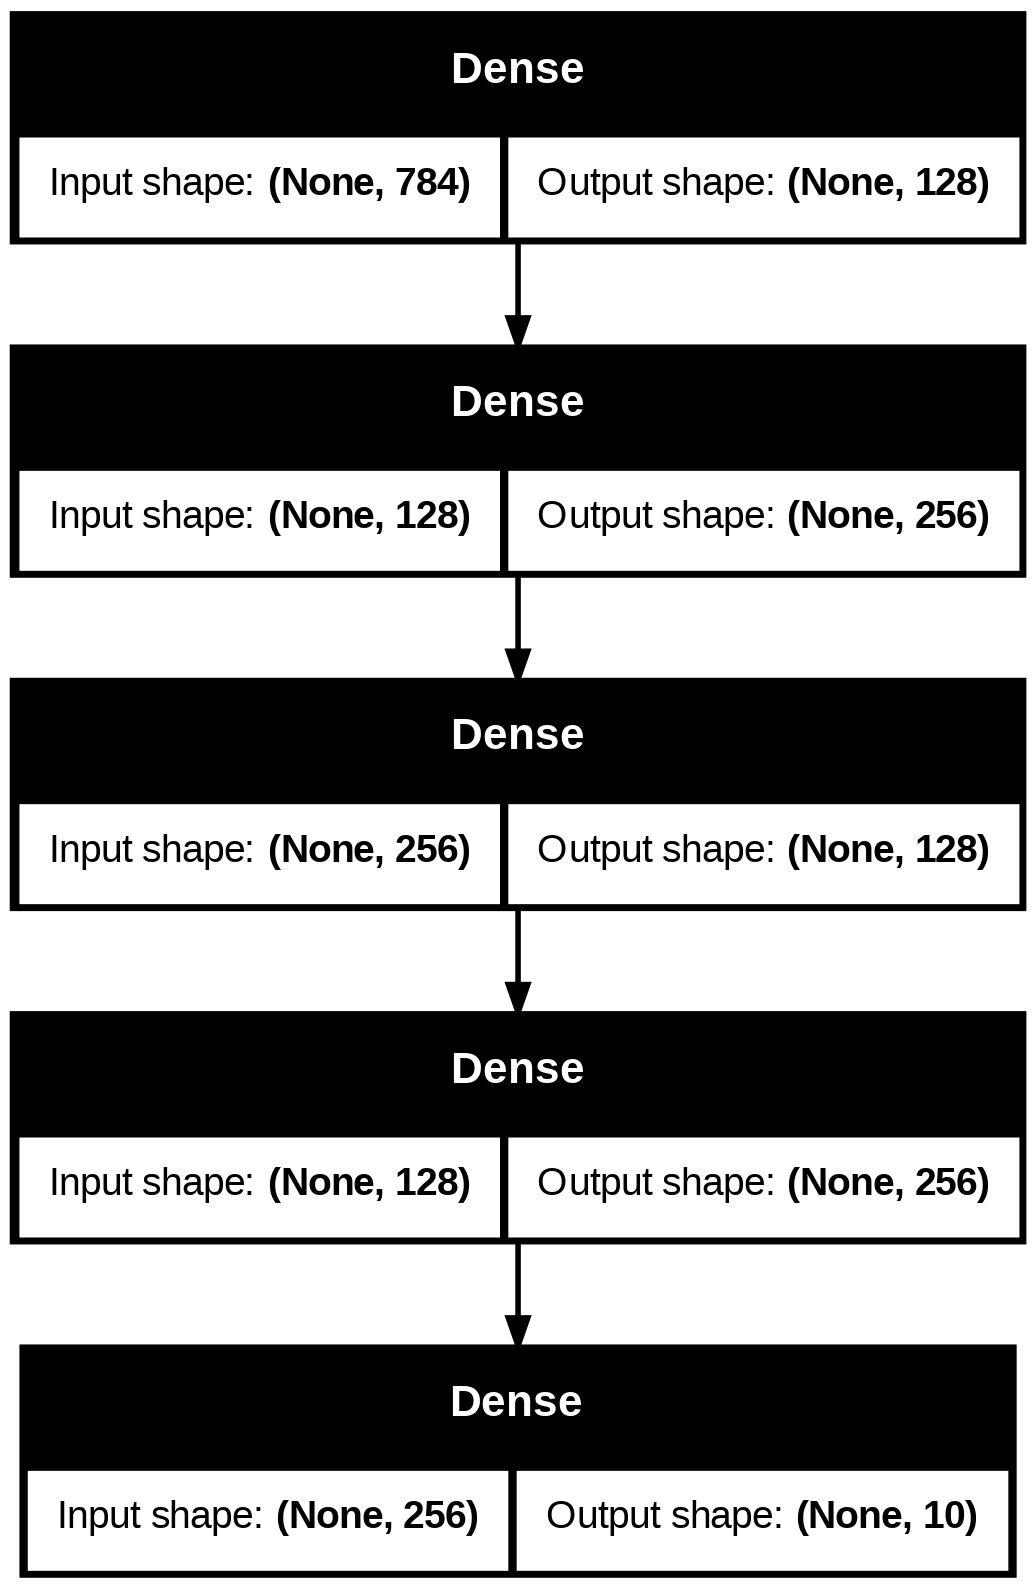

In [178]:
keras.utils.plot_model(model,show_shapes=True)

In [179]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)
y_validation = to_categorical(y_validation, num_classes=10)
y_test= to_categorical(y_test, num_classes=10)

In [180]:
n_epochs = 50              # set number of epochs
batch_size = 512            # you can tweak with these parametrs
history = model.fit(x_train_flatten,y_train,epochs=n_epochs,batch_size=batch_size,validation_data=(x_validation,y_validation))

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.6301 - loss: 6.8583 - val_accuracy: 0.8904 - val_loss: 0.4343
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9100 - loss: 0.3341 - val_accuracy: 0.9213 - val_loss: 0.2941
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9437 - loss: 0.1906 - val_accuracy: 0.9339 - val_loss: 0.2592
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9618 - loss: 0.1227 - val_accuracy: 0.9393 - val_loss: 0.2264
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.9705 - loss: 0.0943 - val_accuracy: 0.9434 - val_loss: 0.2231
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9784 - loss: 0.0699 - val_accuracy: 0.9496 - val_loss: 0.2065
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9855 - loss: 0.0468 - val_accuracy: 0.9522 - val_loss: 0.2020
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9887 - loss: 0.0360 - val_accuracy: 0.9547 - v

### **Evaluate**
Evaluate your model on test data.

And Show some results

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9637 - loss: 0.2918
Loss =  0.24862977862358093
Accuracy =  96.82999849319458 %


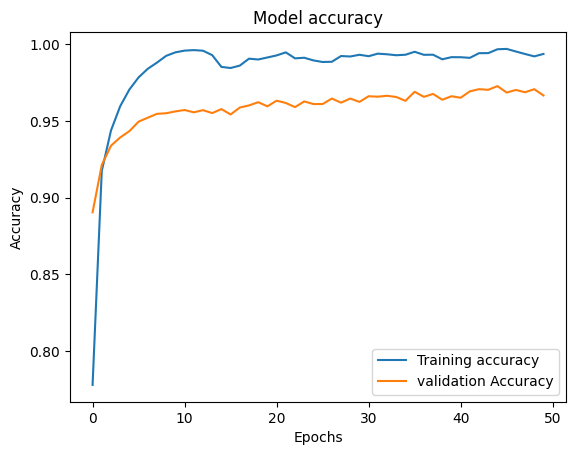

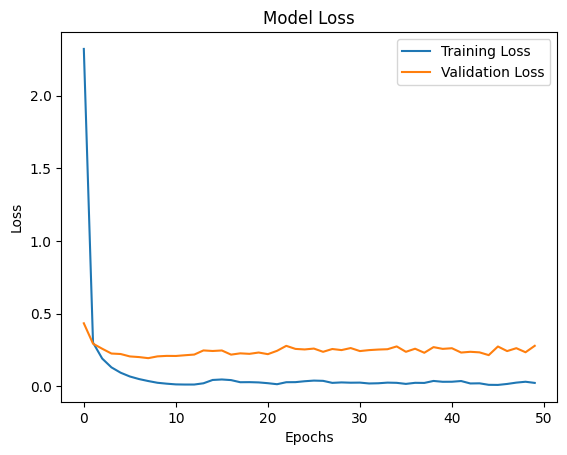

In [181]:
results = model.evaluate(x_test_flatten,y_test)
print("Loss = ",results[0])
print("Accuracy = ",results[1]*100,"%")

# Plot Accuracy...
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="validation Accuracy")
plt.title("Model accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Similarly write code to plot loss...
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

plt.plot(training_loss, label="Training Loss")
plt.plot(validation_loss, label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Lets show our results on images from testing dataset

label: 
4      5      9      6      4      6      2      9      6      7      

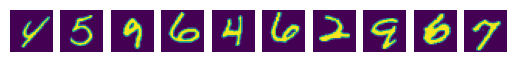

Predicted value: 
4      5      9      6      4      6      2      9      6      7      

In [182]:
n = 10   # = no. of images to see predictions on

index = np.random.choice(x_test.shape[0],n)  # choose random index from test data
print("label: ")

for i,ind in enumerate(index):
    plt.subplot(1,n,i+1)
    plt.imshow(x_test[ind].reshape(28,28))             # fill code to show images from test set
    plt.axis("off")
    print(np.argmax(y_test[ind]),end="      ")

plt.show()
print("Predicted value: ")

# Now lets print the predictions

for i,ind in enumerate(index):
    # write code to predict and print digit in image
    # Hint: the output of the model is a 10-d vector which gives probabilties
    # The digit in the image would be the class for which probability is hghest...
    prob = model.predict(x_test_flatten[ind].reshape(1,784),verbose=0)
    digit = np.argmax(prob)
    print(digit,end="      ")